In [1]:
from biosimulator_processes.processes.copasi_process import CopasiProcess
from biosimulator_processes import CORE 
from process_bigraph import Step
from process_bigraph.experiments.parameter_scan import RunProcess

CobraProcess registered successfully as cobra.

CopasiProcess registered successfully as copasi.

SmoldynProcess registered successfully as smoldyn.

TelluriumProcess registered successfully as tellurium.

AmiciProcess registered successfully as amici.

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'cobra',
  'copasi',
  'smoldyn',
  'tellurium',
  'amici']
GetSbmlStep not available. Error: No module named 'biosimulator_processes.steps.get_sbml'


In [2]:
# TODO: put this in comparator step code

In [ ]:
fp = '/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/test_suite/examples/sbml-core/Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML/Varusai2018.xml'

copasi_process = RunProcess(config={
    'process_address': 'local:copasi',
    'process_config': {'model': {'model_source': fp}},
    'observables': [['floating_species_concentrations', 'Akt']],
    'timestep': 0.7,
    'runtime': 100
}, core=CORE)


t_process = RunProcess(config={
    'process_address': 'local:tellurium',
    'process_config': {'model': {'model_source': fp}},
    'observables': [['floating_species_concentrations', 'Akt']],
    'timestep': 0.7,
    'runtime': 100
}, core=CORE)

        



In [4]:
def adjust_input_state_parameter(ode_process, path_mapping: dict) -> dict:
    input_state = ode_process.process.initial_state()
    for port_name, mapping in path_mapping.items():
        if isinstance(mapping, dict):
            for path_key, path_val in mapping.items():
                if not isinstance(path_val, dict):
                    input_state[port_name][path_key] = path_val
    
    return input_state
    
    
    

In [5]:
obs1 = ['floating_species_concentrations', 'Akt']
proc_address = 'copasi'
step = 0.01
dur = 1000


copasi_proc = generate_ode_process(fp, process_address=proc_address, simulator='copasi', observables=[obs1], step_size=step, duration=dur)


found a filepath


In [6]:
0.5**0.5

0.7071067811865476

In [7]:
import numpy as np
from random import randint

def perturb_param(param_val, perturbation=0.05):
    valRange = np.linspace(0, param_val*perturbation)
    
    random_i = randint(0, valRange.shape[0])
    perturbed_val = valRange[random_i]

In [8]:

input_state = adjust_input_state_parameter(copasi_proc, path_mapping={'floating_species_concentrations': {'pIR': 0.05}})

r = copasi_proc.update(input_state)

/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/biosimulator_processes/processes/copasi_process.py:194: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



KeyboardInterrupt: 

In [19]:
r = copasi_proc.update(perturbed_state)

/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/biosimulator_processes/processes/copasi_process.py:194: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



KeyboardInterrupt: 

In [9]:
copasi_proc.inputs(), copasi_proc.outputs()

({'time': 'float',
  'floating_species_concentrations': {'IR': {'_type': 'float',
    '_apply': 'set'},
   'pIR': {'_type': 'float', '_apply': 'set'},
   'IRS': {'_type': 'float', '_apply': 'set'},
   'pIRS': {'_type': 'float', '_apply': 'set'},
   'iIRS': {'_type': 'float', '_apply': 'set'},
   'Akt': {'_type': 'float', '_apply': 'set'},
   'pAkt': {'_type': 'float', '_apply': 'set'},
   'mTORC1': {'_type': 'float', '_apply': 'set'},
   'pmTORC1': {'_type': 'float', '_apply': 'set'},
   'mTORC2': {'_type': 'float', '_apply': 'set'},
   'pmTORC2': {'_type': 'float', '_apply': 'set'},
   'imTORC2': {'_type': 'float', '_apply': 'set'},
   'mTORC1_DEPTOR': {'_type': 'float', '_apply': 'set'},
   'mTORC2_DEPTOR': {'_type': 'float', '_apply': 'set'},
   'DEPTOR': {'_type': 'float', '_apply': 'set'},
   'pDEPTOR': {'_type': 'float', '_apply': 'set'}},
  'model_parameters': {'V1': {'_type': 'float', '_apply': 'set'},
   'Km1': {'_type': 'float', '_apply': 'set'},
   'V2': {'_type': 'float', '

In [10]:
obs = ProcessObservable(path_root='r', root_children=['x', 'y', 'z'])


[[obs.path_root, *obs.root_children]]

[['r', 'x', 'y', 'z']]

In [11]:
# TODO: create run process for each simulator involved in the comparison

In [12]:
copasi_process

In [13]:
copasi_process.process

In [14]:
copasi_results = copasi_process.update({})
amici_results = t_process.update({})

/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/biosimulator_processes/processes/copasi_process.py:194: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [15]:
from process_bigraph import pp

In [16]:
pp(copasi_results)

{ 'results': { 'floating_species_concentrations': { 'Akt': [ 0.0,
                                                             6.021953401729781e+22,
                                                             6.021112979401326e+22,
                                                             6.019655556618463e+22,
                                                             6.017768516010995e+22,
                                                             6.015611698907673e+22,
                                                             6.013288966310516e+22,
                                                             6.01085505403383e+22,
                                                             6.008328606883569e+22,
                                                             6.005703941780694e+22,
                                                             6.002960066698436e+22,
                                                             6.000067131788502e+22,
           

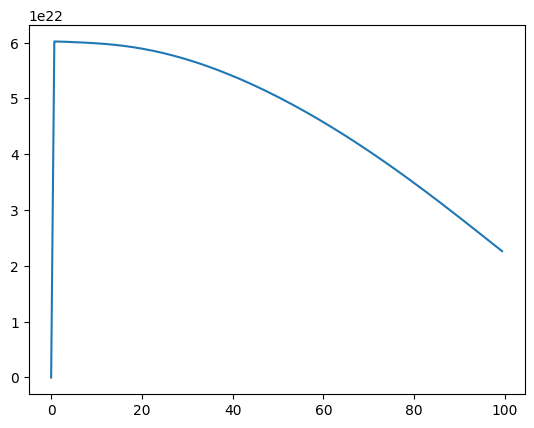

In [17]:
akt_concen = copasi_results['results']['floating_species_concentrations']['Akt']
times = copasi_results['results']['time']


import matplotlib.pyplot as plt


plt.plot(times, akt_concen)
plt.show()

{ 'results': { 'floating_species_concentrations': { 'Akt': [ 0.0,
                                                             6.021953401729781e+22,
                                                             6.021112979401326e+22,
                                                             6.019655556618463e+22,
                                                             6.017768516010995e+22,
                                                             6.015611698907673e+22,
                                                             6.013288966310516e+22,
                                                             6.01085505403383e+22,
                                                             6.008328606883569e+22,
                                                             6.005703941780694e+22,
                                                             6.002960066698436e+22,
                                                             6.000067131788502e+22,
           

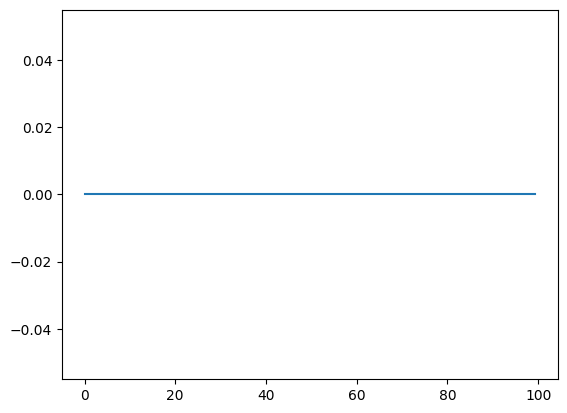

In [18]:
pp(copasi_results)
akt_concen = amici_results['results']['floating_species_concentrations']['Akt']
times = amici_results['results']['time']

import matplotlib.pyplot as plt

plt.plot(times, akt_concen)
plt.show()